In [109]:
import numpy as np 
import pandas 
import pattern
import thinkstats2
import thinkplot

%matplotlib inline

In [110]:
data = pandas.read_csv('../train.tsv', sep = '\t') 

Looking at the data below. 

In [111]:
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


Cleaning the data: 

In [112]:
def clean_data(d):
#     check for empty string
# check for any sentiment values that are not 0, 1, 2, 3
#     print d.isnull().sum()
    
    print data.Phrase[data.Phrase == ""].sum() 
    
    print data.Sentiment[(data.Sentiment < 0)].sum()
    print data.Sentiment[(data.Sentiment > 4)].sum()
    
        

clean_data(data)

0
0
0


Looking at the data, it is clear that the first PhraseId for a setenceId is always the full sentence in its entirety. Then the sentence is broken up into smaller phrases, given a phrase Id, but linked to the same sentenceId because it is part of the same sentence. I wanted to see how the mean sentiment of each of the phrases would compare to the sentiment of the entire sentence. Results are below.

Sample, for sentence id = 1

In [113]:
phraseIdSentiments = data.Sentiment[data.PhraseId[data.SentenceId ==  1]]
phraseIdSentiments[2:len(phraseIdSentiments)].mean()

2.0327868852459017

In [114]:
phraseIdSentiments[1]

2

In [115]:
data.Sentiment[data.SentenceId == 1][0]

1

Interestingly enough the sentiment of the sentence as a whole is much lower than the mean sentiment of all of the phrases. 

In [116]:
sentenceIds = list(set(data.SentenceId))

In [117]:
sentenceSentiments = []
phraseMeans = []
for i in sentenceIds: 
    phraseSents = data.Sentiment[data.PhraseId[data.SentenceId == i]]
#     print phraseSents[0: len(phraseSents)]
    mean = phraseSents[2:len(phraseSents)].mean(); 
    phraseMeans.append(mean)

#     print data[data.PhraseId == 156039]
    sentenceSentiments.append(data.Sentiment[data.SentenceId == i].iloc[0])
#     data.Sentiment[data.SentenceId == i].iloc[0]

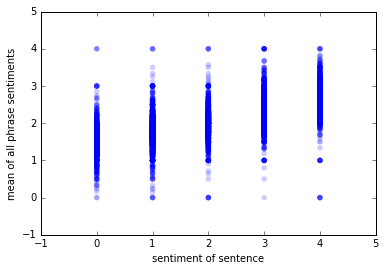

In [118]:
thinkplot.Scatter(sentenceSentiments, phraseMeans)
thinkplot.Show(xlabel = 'sentiment of sentence', ylabel = 'mean of all phrase sentiments')

In [119]:
data.Phrase[data.Sentiment ==4]

63        This quiet , introspective and entertaining in...
66        quiet , introspective and entertaining indepen...
74                                             entertaining
77                                         is worth seeking
117       A positively thrilling combination of ethnogra...
118       A positively thrilling combination of ethnogra...
123                                               thrilling
166       A comedy-drama of nearly epic proportions root...
172                                             nearly epic
176       rooted in a sincere performance by the title c...
180                                in a sincere performance
182                                   a sincere performance
183                                     sincere performance
280                                     recommend Snow Dogs
303                                           high hilarity
352                  The performances are an absolute joy .
355                                   ar

In [130]:
p_words = {}
phrases = data.Phrase[data.Sentiment ==4]
for phrase in phrases:
#     print(phrase)
    all_info = phrase.split()
    for word in all_info: 
#         print(word)
        if(word not in p_words): 
            p_words[word] = 1
        else: 
            p_words[word] += 1

In [131]:
p_words

{'aided': 1,
 'Poetry': 2,
 'foul': 1,
 'Sugar': 6,
 'four': 7,
 'woods': 1,
 'Until': 2,
 'marching': 2,
 'satisfyingly': 3,
 'originality': 34,
 'Michel': 6,
 'lore': 2,
 'Refreshing': 1,
 'Blade': 4,
 'bringing': 12,
 'disturb': 1,
 'grueling': 1,
 'Sundance': 6,
 'Paul': 5,
 'reliable': 2,
 'bill': 4,
 'pulse': 1,
 '270': 1,
 'Matthew': 1,
 'second': 10,
 'valiant': 5,
 'Charade': 2,
 'admire': 7,
 'ruthless': 1,
 'contributed': 1,
 'fingers': 1,
 'nerve-raked': 1,
 'succumb': 3,
 'shocks': 2,
 'hero': 12,
 'here': 36,
 'cult': 11,
 'transfixes': 3,
 'substance': 1,
 'uplifting': 16,
 'pretensions': 1,
 'elaborate': 9,
 'controversy': 4,
 'grade-school': 2,
 'Goliath': 1,
 'classification': 1,
 'skillfully': 9,
 'psychological': 35,
 'slivers': 1,
 'insecurity': 3,
 'music': 81,
 'therefore': 1,
 'Caine': 3,
 'until': 7,
 'Western': 1,
 'successful': 37,
 'brings': 17,
 'mesmerize': 5,
 'hurt': 1,
 'exuberantly': 1,
 'glass': 1,
 'hold': 11,
 '95': 5,
 'circumstances': 2,
 'morally

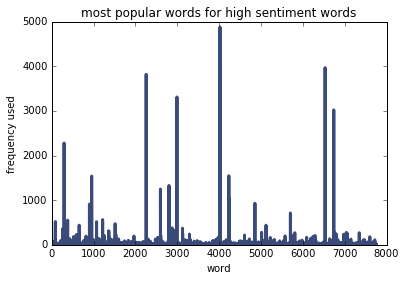

In [132]:
xs = np.arange(0, len(p_words), 1)
thinkplot.plot(xs, p_words.values())
thinkplot.show(xlabel = 'word', ylabel = 'frequency used', title = 'most popular words for high sentiment words')

What is the most widely used word, what is word 4000? 

In [133]:
for word in p_words: 
    print(word, p_words[word])

('aided', 1)
('Poetry', 2)
('foul', 1)
('Sugar', 6)
('four', 7)
('woods', 1)
('Until', 2)
('marching', 2)
('satisfyingly', 3)
('originality', 34)
('Michel', 6)
('lore', 2)
('Refreshing', 1)
('Blade', 4)
('bringing', 12)
('disturb', 1)
('grueling', 1)
('Sundance', 6)
('Paul', 5)
('reliable', 2)
('bill', 4)
('pulse', 1)
('270', 1)
('Matthew', 1)
('second', 10)
('valiant', 5)
('Charade', 2)
('admire', 7)
('ruthless', 1)
('contributed', 1)
('fingers', 1)
('nerve-raked', 1)
('succumb', 3)
('shocks', 2)
('hero', 12)
('here', 36)
('cult', 11)
('transfixes', 3)
('substance', 1)
('uplifting', 16)
('pretensions', 1)
('elaborate', 9)
('controversy', 4)
('grade-school', 2)
('Goliath', 1)
('classification', 1)
('skillfully', 9)
('psychological', 35)
('slivers', 1)
('insecurity', 3)
('music', 81)
('therefore', 1)
('Caine', 3)
('until', 7)
('Western', 1)
('successful', 37)
('brings', 17)
('mesmerize', 5)
('hurt', 1)
('exuberantly', 1)
('glass', 1)
('hold', 11)
('95', 5)
('circumstances', 2)
('morally

In [134]:
for w in sorted(p_words, key=words.get, reverse=True):
    print (w, p_words[w])

(',', 4879)
('the', 3819)
('a', 3311)
('and', 3968)
('of', 3022)
('.', 2280)
('to', 1540)
('is', 1547)
("'s", 1329)
('that', 1248)
('in', 1045)
('it', 739)
('movie', 564)
('as', 713)
('this', 473)
('for', 553)
('its', 516)
('film', 930)
('with', 912)
("n't", 131)
('you', 379)
('bad', 5)
('an', 664)
('--', 329)
('or', 100)
('be', 295)
('so', 230)
('The', 372)
('by', 313)
('like', 127)
('on', 314)
('than', 209)
('at', 263)
('one', 439)
('not', 167)
('from', 270)
('I', 194)
('too', 35)
('have', 199)
('about', 228)
('...', 241)
('more', 209)
('but', 270)
('all', 247)
("'", 131)
('are', 258)
('A', 520)
('has', 314)
('out', 104)
('just', 71)
('his', 277)
('your', 142)
('no', 43)
('into', 172)
('characters', 149)
('comedy', 229)
('minutes', 10)
('up', 136)
('even', 104)
('`', 79)
('It', 124)
('any', 85)
('who', 189)
('worst', 1)
('story', 236)
('``', 118)
('would', 30)
('time', 99)
('most', 439)
('if', 53)
('dull', 6)
('through', 47)
('-RRB-', 146)
('does', 79)
('plot', 20)
("''", 136)
('can'

As is the case, it seems like the most popular word was: ",". This is to be expected because I did not filter by puncutation. Beyond that, frequently occuring words are "and" and "the". These are the most common words in the english language. Past small pronouns, high scoring words are like "best" and "funny" and "film".  

Now let's try the most negative scoring words! 

In [125]:
data.Phrase[data.Sentiment ==0]

101         would have a hard time sitting through this one
103               have a hard time sitting through this one
157       Aggressive self-glorification and a manipulati...
159         self-glorification and a manipulative whitewash
201                  Trouble Every Day is a plodding mess .
208                                      is a plodding mess
210                                           plodding mess
261                       could hate it for the same reason
264                                                 hate it
265                                                    hate
311       is Oedekerk 's realization of his childhood dr...
430          baseball movies that try too hard to be mythic
848       Hampered -- no , paralyzed -- by a self-indulg...
861                                 a self-indulgent script
919       There 's very little sense to what 's going on...
1001                                                  avoid
1003      almost feels as if the movie i

In [135]:
n_words = {}
phrases = data.Phrase[data.Sentiment ==0]
for phrase in phrases:
#     print(phrase)
    all_info = phrase.split()
    for word in all_info: 
#         print(word)
        if(word not in n_words): 
            n_words[word] = 1
        else: 
            n_words[word] += 1

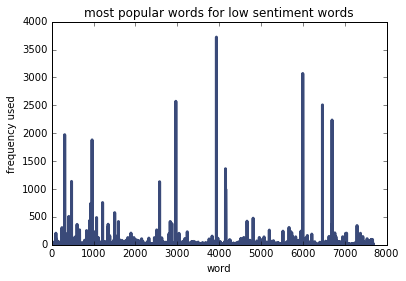

In [127]:
xs = np.arange(0, len(n_words), 1)
thinkplot.plot(xs, n_words.values())
thinkplot.show(xlabel = 'word', ylabel = 'frequency used', title = 'most popular words for low sentiment words')

In [136]:
for word in n_words: 
    print(word, n_words[word])

('yellow', 3)
('Sugar', 2)
('four', 12)
('Does', 5)
('clotted', 3)
('hanging', 1)
('conjuring', 1)
('comically', 1)
('payoff', 9)
('wizardry', 2)
('originality', 2)
('superficially', 1)
('Western', 2)
('immature', 8)
('Frankly', 1)
('Blade', 7)
('Studios', 3)
('foul', 6)
('screaming', 9)
('Less', 6)
('wooden', 5)
('voyeur', 1)
('Feel', 1)
('Sundance', 1)
('stereotypical', 10)
('Paul', 1)
('sturm', 1)
('tired', 41)
('big-wave', 2)
('pulse', 1)
('second', 11)
('driven', 3)
('admire', 3)
('errors', 2)
('existentialism', 1)
('negated', 1)
('succumb', 4)
('insinuation', 1)
('hero', 10)
('here', 47)
('Wanderers', 1)
('cult', 3)
('conversational', 1)
('kids', 30)
('elaborate', 1)
('Feathers', 2)
('controversy', 2)
('dimness', 2)
('spotty', 1)
('criticism', 2)
('swan', 4)
('projection', 1)
('owed', 2)
('Three', 1)
('brought', 11)
('unanswered', 2)
('Humorless', 4)
('sloppily', 11)
('cannibal', 2)
('music', 17)
('therefore', 2)
('Caine', 1)
('strike', 2)
('until', 7)
('mired', 1)
('successful',

In [137]:
for w in sorted(n_words, key=n_words.get, reverse=True):
    print (w, n_words[w])

(',', 3722)
('the', 3070)
('a', 2572)
('and', 2507)
('of', 2236)
('.', 1973)
('to', 1880)
('is', 1363)
("'s", 1136)
('that', 1130)
('in', 998)
('it', 927)
('movie', 757)
('as', 738)
('this', 576)
('for', 509)
('its', 488)
('film', 477)
('with', 437)
("n't", 424)
('you', 418)
('bad', 417)
('an', 407)
('--', 381)
('or', 377)
('be', 369)
('so', 366)
('The', 345)
('by', 334)
('like', 311)
('on', 310)
('than', 308)
('at', 294)
('one', 268)
('not', 267)
('from', 264)
('I', 255)
('too', 246)
('have', 245)
('about', 243)
('more', 233)
('...', 233)
('but', 220)
('all', 214)
("'", 210)
('are', 209)
('A', 208)
('has', 208)
('out', 207)
('just', 206)
('his', 206)
('your', 196)
('no', 192)
('into', 178)
('characters', 167)
('comedy', 161)
('minutes', 161)
('up', 160)
('even', 156)
('`', 152)
('any', 151)
('It', 151)
('who', 148)
('worst', 145)
('story', 145)
('``', 143)
('would', 143)
('time', 142)
('most', 142)
('if', 136)
('dull', 132)
('through', 132)
('-RRB-', 131)
('does', 130)
('plot', 130)
(

In [146]:
shares_words = []
for word in (n_words and p_words): 
    print word
    shares_words.append(word)
print(len(shares_words))

aided
Poetry
foul
Sugar
four
woods
Until
marching
satisfyingly
originality
Michel
lore
Refreshing
Blade
bringing
disturb
grueling
Sundance
Paul
reliable
bill
pulse
270
Matthew
second
valiant
Charade
admire
ruthless
contributed
fingers
nerve-raked
succumb
shocks
hero
here
cult
transfixes
substance
uplifting
pretensions
elaborate
controversy
grade-school
Goliath
classification
skillfully
psychological
slivers
insecurity
music
therefore
Caine
until
Western
successful
brings
mesmerize
hurt
exuberantly
glass
hold
95
circumstances
morally
accomplishment
Arwen
example
expressively
chasm
peppering
Highlighted
Brian
want
absolute
Ferrera
travel
feature
machine
how
hot
well-constructed
Notting
retooled
significance
chase
classify
A
Bates
beauty
funny
L.
survivable
modest
destined
steadfast
effective
wins
fleetingly
fictional
Eric
Fabulous
Another
keeps
nonsensical
wind
Even
derring-do
Jules
rewarded
wrought
welcomes
admirably
His
wickedly
fit
Admirers
survivors
Harris
hidden
admirable
perkiness
